In [1]:
%config Completer.use_jedi = False

# Load fruits data

In [2]:
import numpy as np

In [3]:
fruits = np.load('./fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

# Build a PCA model

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
pca.components_.shape

(50, 10000)

# Visualize the components

In [7]:
import matplotlib.pyplot as plt

In [8]:
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if (i * 10) + j < n:
                axs[i, j].imshow(arr[(10 * i) + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

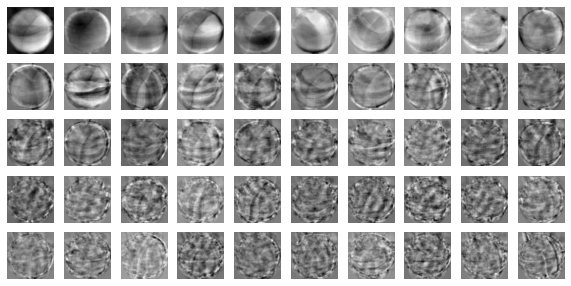

In [9]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [10]:
fruits_2d.shape

(300, 10000)

In [11]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [12]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

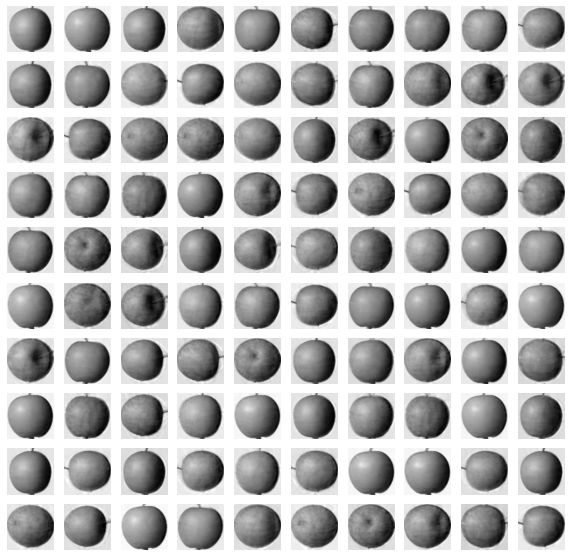

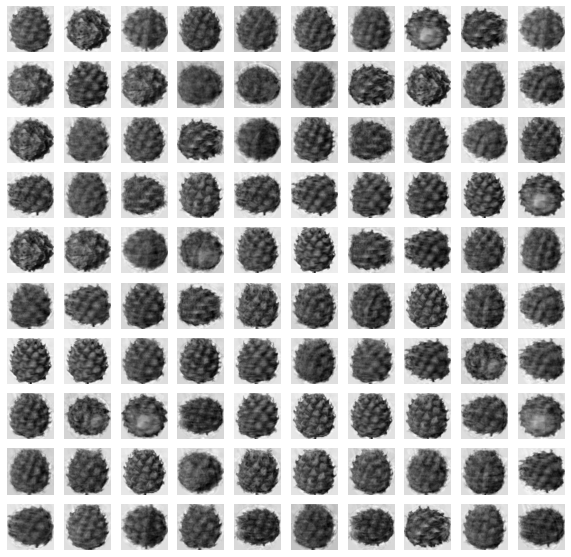

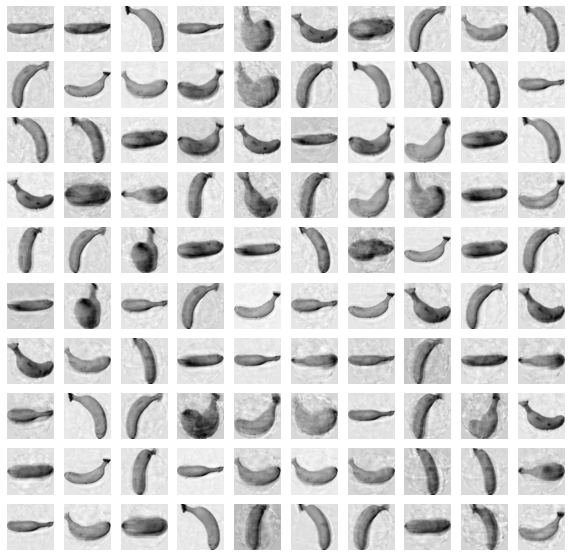

In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

In [14]:
np.sum(pca.explained_variance_ratio_)

0.9215043818088069

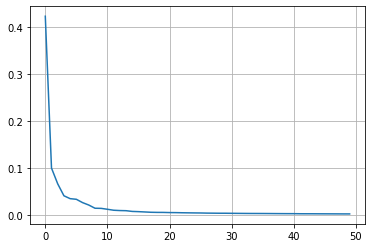

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.grid()
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression()

In [18]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [19]:
from sklearn.model_selection import cross_validate

In [20]:
scores = cross_validate(lr, fruits_2d, target)

In [21]:
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.6012482643127441


In [22]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.036613988876342776


In [23]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.n_components_

2

In [24]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [25]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.04643373489379883


/Users/jaehwanglee/tensorflow2_p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jaehwanglee/tensorflow2_p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [26]:
from sklearn.cluster import KMeans

In [27]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [28]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

# Visualize result

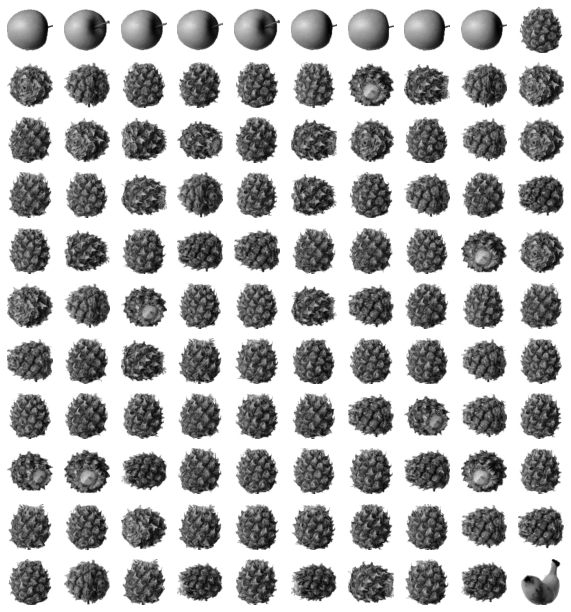

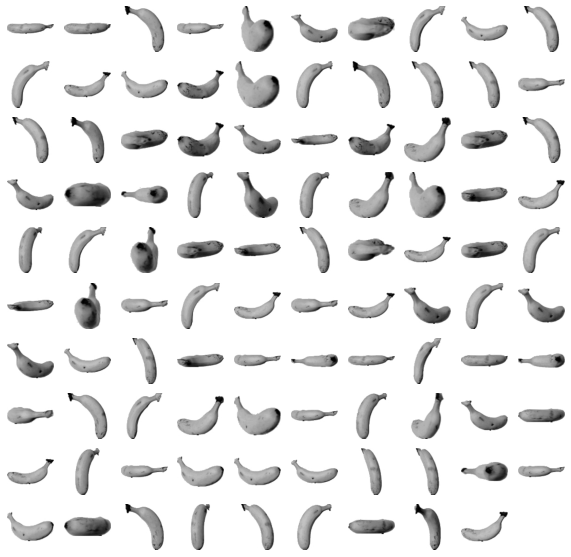

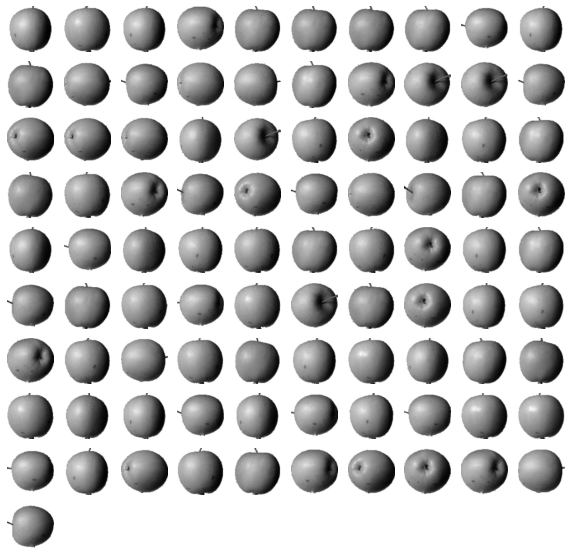

In [29]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

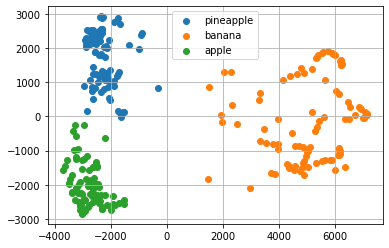

In [30]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.grid()
plt.show()